In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 50
pd.set_option('max_columns', 50)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
sns.set(style='ticks', context='talk')
sns.set(rc={"figure.figsize": (10, 10)})

More magic:
  
`%alias_magic t time`<br>
`?str.replace()`<br>
`%run ./two-histograms.ipynb`<br>
`!ls`<br>
`%lsmagic`<br>

Also https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/

In [3]:
import json
path = 'datasets/bitly_usagov/example.txt'
records = [json.loads(line) for line in open(path)]

# 14.1 Counting Time Zones in Pure Python

In [4]:
frame = pd.DataFrame(records)
del frame['_heartbeat_']
frame.head()

,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [5]:
top_zones = frame.tz.value_counts().head(10)
top_zones


America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

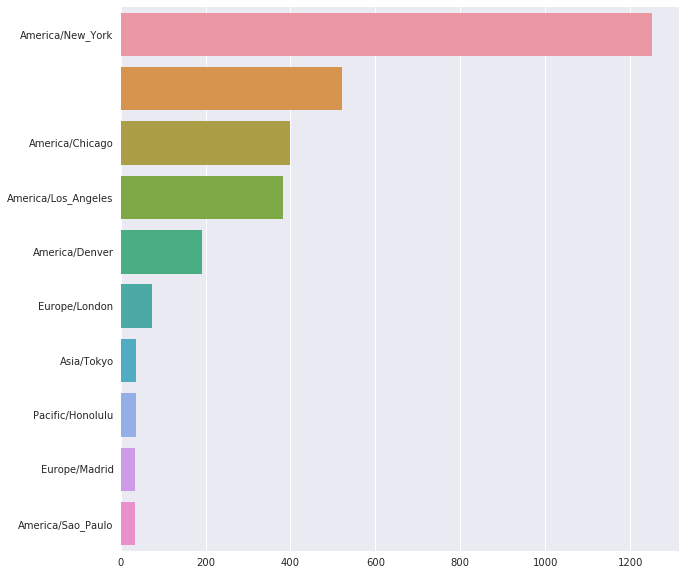

In [6]:
sns.barplot(x=top_zones.values, y=top_zones.index);

In [7]:
cframe = frame.copy()
cframe['os'] = np.where(frame.a.str.contains('Windows'), 'Windows', 'Not Windows')
g = cframe.groupby(['tz', 'os']).size().unstack().fillna(0)
g.head()

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


In [8]:
g.sum(axis=1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [9]:
g2 = g.copy()
g2['total'] = g2.sum(axis=1)
g2 = g2.sort_values('total', ascending=False)
g2 = g2.stack()
g2.name = 'total'
g2 = g2.reset_index()
g2 = g2[g2.os != 'total']
g2.head(10)

,tz,os,total
0,America/New_York,Not Windows,339.0
1,America/New_York,Windows,912.0
3,,Not Windows,245.0
4,,Windows,276.0
6,America/Chicago,Not Windows,115.0
7,America/Chicago,Windows,285.0
9,America/Los_Angeles,Not Windows,130.0
10,America/Los_Angeles,Windows,252.0
12,America/Denver,Not Windows,132.0
13,America/Denver,Windows,59.0


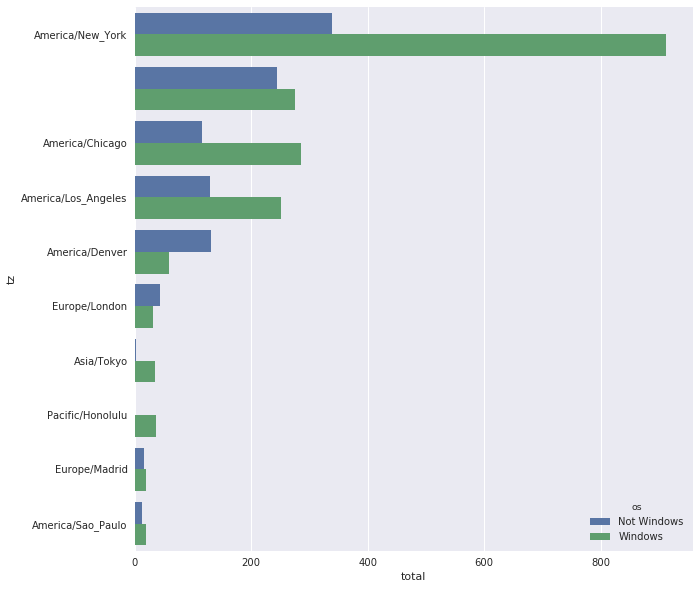

In [10]:
sns.barplot(x='total', y='tz', hue='os', data=g2.head(20));

# 14.2 MovieLens 1M Dataset

In [11]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('datasets/movielens/users.dat', sep=r'::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('datasets/movielens/ratings.dat', sep=r'::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep=r'::', header=None, names=mnames, engine='python')

In [12]:
users.head()
ratings.head()
movies.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
data = pd.merge(pd.merge(users, ratings), movies)
data.head()
data.tail()

,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56,16,70072,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25,12,32793,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25,7,22903,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50,1,95350,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama


,user_id,gender,age,occupation,zip,movie_id,rating,timestamp,title,genres
1000204,5949,M,18,17,47901,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,M,35,14,30030,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,M,18,17,92886,2845,1,958153068,White Boys (1999),Drama
1000207,5851,F,18,20,55410,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western
1000208,5938,M,25,1,35401,2909,4,957273353,"Five Wives, Three Secretaries and Me (1998)",Documentary


In [14]:
data[['title', 'gender', 'rating']].groupby(['title', 'gender']).mean().unstack().head()

rating          
gender                                F         M
title                                            
$1,000,000 Duck (1971)         3.375000  2.761905
'Night Mother (1986)           3.388889  3.352941
'Til There Was You (1997)      2.675676  2.733333
'burbs, The (1989)             2.793478  2.962085
...And Justice for All (1979)  3.828571  3.689024

In [15]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings.head()

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [16]:
ratings_by_title = data.groupby('title').size()
ratings_by_title.head()

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

In [17]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles.to_frame().head()

,title
title,
"'burbs, The (1989)","'burbs, The (1989)"
10 Things I Hate About You (1999),10 Things I Hate About You (1999)
101 Dalmatians (1961),101 Dalmatians (1961)
101 Dalmatians (1996),101 Dalmatians (1996)
12 Angry Men (1957),12 Angry Men (1957)


In [18]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings.head()

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421


In [19]:
mean_ratings.sort_values('F', ascending=False).head(10)

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


In [20]:
mean_ratings['diff'] = mean_ratings.M - mean_ratings.F
sorted_by_diff = mean_ratings.sort_values('diff')
sorted_by_diff.head()

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777


In [21]:
sorted_by_diff.head(10)

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [22]:
sorted_by_diff.tail(10)

gender,F,M,diff
title,,,
For a Few Dollars More (1965),3.409091,3.953795,0.544704
Caddyshack (1980),3.396135,3.969737,0.573602
Rocky III (1982),2.361702,2.943503,0.581801
"Hidden, The (1987)",3.137931,3.745098,0.607167
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
"Longest Day, The (1962)",3.411765,4.031447,0.619682
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359


In [23]:
std_rating = data.groupby('title')['rating'].std()
std_rating.head()

title
$1,000,000 Duck (1971)           1.092563
'Night Mother (1986)             1.118636
'Til There Was You (1997)        1.020159
'burbs, The (1989)               1.107760
...And Justice for All (1979)    0.878110
Name: rating, dtype: float64

In [24]:
std_rating[active_titles].sort_values(ascending=False).head(10)

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64